## 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
Check that the features are in numeric format (dtypes), this will be needed for modeling!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('02_dataset_worldbank_jobs_2016.tsv',header=0,sep="\t")
df

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.1371383666992
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.7942
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,86.5709321507136
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,20.9658976104561
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.97175068925613
...,...,...,...,...,...
36017,Zimbabwe,ZWE,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,54.7670001983642
36018,Zimbabwe,ZWE,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,65.2250003814698
36019,Zimbabwe,ZWE,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,23.3229999542236
36020,Zimbabwe,ZWE,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,44.4000015258789


In [3]:
df.isna().sum()

Country Name     0
Country Code     0
Series Name      0
Series Code      0
2016 [YR2016]    0
dtype: int64

In [4]:
pivotdf = pd.pivot_table(df, index="Country Name", columns="Series Code", values="2016 [YR2016]",dropna=False,aggfunc=np.sum, fill_value=np.NaN).reset_index()
pivotdf = pivotdf.replace('..',np.NaN)
pivotdf

Series Code,Country Name,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
0,Afghanistan,-0.0758945950132622,118216397.348387,0.480709517928724,277483515.060727,NaN,84.1371383666992,NaN,53.0834053242655,1.07421538203442,...,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,NaN,434.3793696,NaN
1,Albania,0.0592091751160614,147128144.977279,8.78673446886916,996001354.462477,NaN,100,NaN,104.967189781022,33.8068122098151,...,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,11.1789815992628,750.385083,0.647750656841347
2,Algeria,0.0294232818669463,58970227.8597211,1.02947518020851,16968009.5282417,NaN,99.439567565918,NaN,17.0488949050296,8.66860435469889,...,40606052,11589373,28.541,29016679,71.459,5.1810220711,144.9360226,93.9921282481577,131.0999178,0.343523928820444
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.995,NaN,...,55599,7118,12.802,48481,87.198,NaN,44.99974113,NaN,112.6191164,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,100,NaN,164.427659574468,NaN,...,77281,9082,11.752,68199,88.248,NaN,149.8840596,NaN,186.0462838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,100,NaN,307.171428571429,NaN,...,107510,4859,4.52,102651,95.48,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,-0.335063128497568,31892283.1982751,2.2082538031084,201019711.578932,25.250973878457,100,NaN,756.074086378738,22.711191340784,...,4551566,1109308,24.372,3442258,75.628,3.1039879516,132.9262109,0.163515884810308,199.0937813,0.593923311335099
214,"Yemen, Rep.",0.191606931501499,NaN,-3.08016185948595,NaN,NaN,71.6423492431641,NaN,52.2457961626608,NaN,...,27584213,17821057,64.606,9763156,35.394,NaN,11.12988709,NaN,24.5158127,NaN
215,Zambia,0.843339723083547,63405836.4378634,3.16307184259788,38464441.0005245,NaN,27.2193374633789,NaN,22.3185541909361,11.1525244935673,...,16591390,9550336,57.562,7041054,42.438,NaN,267.8411004,NaN,650.0782034,NaN


In [5]:
pivotdf.dtypes

Series Code
Country Name            object
BM.KLT.DINV.WD.GD.ZS    object
BM.TRF.PWKR.CD.DT       object
BX.KLT.DINV.WD.GD.ZS    object
BX.TRF.PWKR.CD          object
                         ...  
TM.VAL.ICTG.ZS.UN       object
TX.QTY.MRCH.XD.WD       object
TX.VAL.FUEL.ZS.UN       object
TX.VAL.MRCH.XD.WD       object
TX.VAL.TECH.MF.ZS       object
Length: 167, dtype: object

In [6]:
type(pivotdf)

pandas.core.frame.DataFrame

In [7]:
pivotdf = pivotdf.convert_dtypes()
for i in pivotdf:
    try:
        pivotdf[i]= pd.to_numeric(pivotdf[i])
    except Exception as e:
        print(i, e)
pivotdf.dtypes

Country Name Unable to parse string "Afghanistan" at position 0


Series Code
Country Name             string
BM.KLT.DINV.WD.GD.ZS    float64
BM.TRF.PWKR.CD.DT       float64
BX.KLT.DINV.WD.GD.ZS    float64
BX.TRF.PWKR.CD          float64
                         ...   
TM.VAL.ICTG.ZS.UN       float64
TX.QTY.MRCH.XD.WD       float64
TX.VAL.FUEL.ZS.UN       float64
TX.VAL.MRCH.XD.WD       float64
TX.VAL.TECH.MF.ZS       float64
Length: 167, dtype: object

In [8]:
pivotdf.isna().sum()

Series Code
Country Name             0
BM.KLT.DINV.WD.GD.ZS    56
BM.TRF.PWKR.CD.DT       50
BX.KLT.DINV.WD.GD.ZS    31
BX.TRF.PWKR.CD          72
                        ..
TM.VAL.ICTG.ZS.UN       74
TX.QTY.MRCH.XD.WD       16
TX.VAL.FUEL.ZS.UN       76
TX.VAL.MRCH.XD.WD       16
TX.VAL.TECH.MF.ZS       87
Length: 167, dtype: int64

In [9]:
indexes = [x for x,y in pivotdf.isnull().sum(axis=1).to_dict().items() if y < 60]
pivotdf = pivotdf.iloc[indexes]
pivotdf

Series Code,Country Name,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
0,Afghanistan,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,<NA>,53.083405,1.074215,...,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
1,Albania,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,<NA>,104.967190,33.806812,...,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
2,Algeria,0.029423,5.897023e+07,1.029475,1.696801e+07,NaN,99.439568,<NA>,17.048895,8.668604,...,40606052.0,11589373.0,28.541,29016679.0,71.459,5.181022,144.936023,93.992128,131.099918,0.343524
7,Argentina,0.321978,8.235657e+08,0.587564,3.526393e+08,11.462532,100.000000,<NA>,16.022067,60.103738,...,43847430.0,3671345.0,8.373,40176085.0,91.627,8.478812,124.366098,2.532451,219.174671,8.792815
8,Armenia,0.627752,3.580155e+08,3.206058,6.086609e+08,NaN,100.000000,<NA>,102.733263,61.139439,...,2924816.0,1079784.0,36.918,1845032.0,63.082,4.895353,355.656554,3.821998,609.007478,5.938609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Vietnam,0.487149,7.600000e+07,6.138072,NaN,32.344566,100.000000,<NA>,304.992653,24.501957,...,94569072.0,61933285.0,65.490,32635787.0,34.510,22.588363,646.154973,2.031322,1220.635564,NaN
213,West Bank and Gaza,-0.335063,3.189228e+07,2.208254,2.010197e+08,25.250974,100.000000,<NA>,756.074086,22.711191,...,4551566.0,1109308.0,24.372,3442258.0,75.628,3.103988,132.926211,0.163516,199.093781,0.593923
214,"Yemen, Rep.",0.191607,NaN,-3.080162,NaN,NaN,71.642349,<NA>,52.245796,NaN,...,27584213.0,17821057.0,64.606,9763156.0,35.394,NaN,11.129887,NaN,24.515813,NaN
215,Zambia,0.843340,6.340584e+07,3.163072,3.846444e+07,NaN,27.219337,<NA>,22.318554,11.152524,...,16591390.0,9550336.0,57.562,7041054.0,42.438,NaN,267.841100,NaN,650.078203,NaN


In [10]:
pivotdf = pivotdf.dropna(axis=1, how='any')
pivotdf.isna().sum()

Series Code
Country Name            0
BX.KLT.DINV.WD.GD.ZS    0
EG.ELC.ACCS.ZS          0
EN.POP.DNST             0
IT.CEL.SETS.P2          0
                       ..
SP.POP.TOTL             0
SP.RUR.TOTL             0
SP.RUR.TOTL.ZS          0
SP.URB.TOTL             0
SP.URB.TOTL.IN.ZS       0
Length: 63, dtype: int64

In [83]:
pivotdf.shape

(158, 63)

In [ ]:
pivotdf.compare(df2, keep_equal=True)

In [63]:
seriesdf = pivotdf.set_index("Country Name").T.reset_index()
seriesdf

Country Name,Series Code,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,BX.KLT.DINV.WD.GD.ZS,4.807095e-01,8.786734e+00,1.029475e+00,5.875642e-01,3.206058e+00,3.524720e+00,-7.663361e+00,1.188265e+01,0.622728,...,2.516687e+00,1.002737e+01,2.574113e+00,-7.195410e-01,9.915727e-02,6.138072e+00,2.208254e+00,-3.080162e+00,3.163072e+00,2.063867e+00
1,EG.ELC.ACCS.ZS,8.413714e+01,1.000000e+02,9.943957e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,7.164235e+01,2.721934e+01,3.814514e+01
2,EN.POP.DNST,5.308341e+01,1.049672e+02,1.704889e+01,1.602207e+01,1.027333e+02,3.151505e+00,1.058695e+02,1.180433e+02,39.084116,...,1.108805e+02,2.711345e+02,3.535488e+01,1.967779e+01,7.486577e+01,3.049927e+02,7.560741e+02,5.224580e+01,2.231855e+01,4.174838e+01
3,IT.CEL.SETS.P2,6.233542e+01,1.151523e+02,1.158481e+02,1.453305e+02,1.174285e+02,1.100521e+02,1.637945e+02,1.047672e+02,92.068133,...,2.147349e+02,1.199773e+02,1.228759e+02,1.485693e+02,7.398334e+01,1.275261e+02,7.750822e+01,5.957413e+01,7.242934e+01,7.974388e+01
4,IT.MLT.MAIN.P2,3.295011e-01,8.496597e+00,8.384733e+00,2.266639e+01,1.817632e+01,3.390554e+01,4.094518e+01,1.748244e+01,30.950434,...,2.465917e+01,5.094078e+01,3.772120e+01,3.233345e+01,1.085300e+01,5.919501e+00,9.017462e+00,4.226432e+00,6.112026e-01,1.892961e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,SP.POP.TOTL,3.465603e+07,2.876101e+06,4.060605e+07,4.384743e+07,2.924816e+06,2.421081e+07,8.736668e+06,9.757812e+06,391232.000000,...,9.269612e+06,6.559556e+07,3.234059e+08,3.444006e+06,3.184790e+07,9.456907e+07,4.551566e+06,2.758421e+07,1.659139e+07,1.615036e+07
58,SP.RUR.TOTL,2.598509e+07,1.195854e+06,1.158937e+07,3.671345e+06,1.079784e+06,3.437935e+06,3.677700e+06,4.388966e+06,67167.000000,...,1.300990e+06,1.122602e+07,5.865937e+07,1.672410e+05,1.571694e+07,6.193328e+07,1.109308e+06,1.782106e+07,9.550336e+06,1.093444e+07
59,SP.RUR.TOTL.ZS,7.498000e+01,4.157900e+01,2.854100e+01,8.373000e+00,3.691800e+01,1.420000e+01,4.209500e+01,4.497900e+01,17.168000,...,1.403500e+01,1.711400e+01,1.813800e+01,4.856000e+00,4.935000e+01,6.549000e+01,2.437200e+01,6.460600e+01,5.756200e+01,6.770400e+01
60,SP.URB.TOTL,8.670939e+06,1.680247e+06,2.901668e+07,4.017608e+07,1.845032e+06,2.077287e+07,5.058968e+06,5.368846e+06,324065.000000,...,7.968622e+06,5.436954e+07,2.647466e+08,3.276765e+06,1.613096e+07,3.263579e+07,3.442258e+06,9.763156e+06,7.041054e+06,5.215921e+06


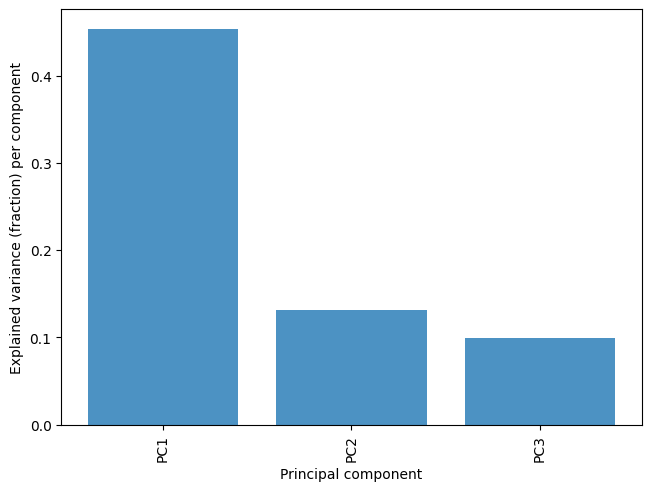

In [86]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = pivotdf.iloc[:, 1:-1].values
# Separating out the target
y = pivotdf.loc[:,['Country Name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

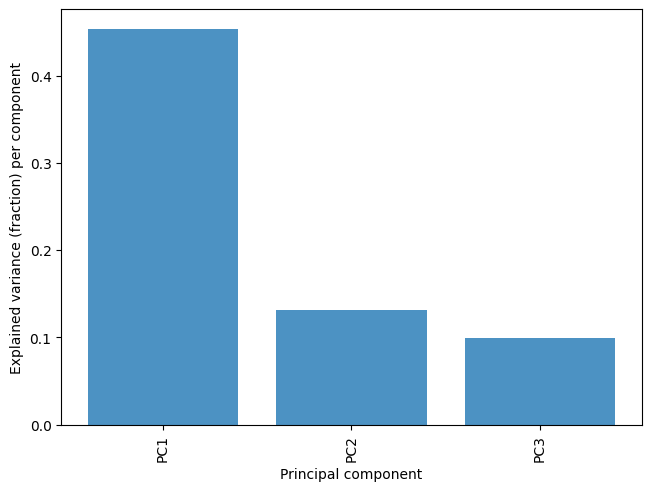

,principal component 1,principal component 2,principal component 3
0,7.257474,-0.907401,1.488553
1,1.274987,-0.974603,2.407951
2,-2.173057,-0.002268,2.764256
3,-3.499837,-0.190612,0.393483
4,-0.582768,-1.474139,2.899892
...,...,...,...
153,2.780124,2.117265,-2.125900
154,-0.525377,-2.852262,6.632204
155,2.536135,-2.680977,6.018693
156,8.441763,-0.955498,-0.272752


In [90]:
from sklearn.decomposition import PCA
from psynlig import pca_explained_variance_bar
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf

In [189]:
finalDf = pd.concat([principalDf, pivotdf[["Country Name"]].reset_index()], axis=1).drop(columns="index")
finalDf

,principal component 1,principal component 2,principal component 3,Country Name
0,7.257474,-0.907401,1.488553,Afghanistan
1,1.274987,-0.974603,2.407951,Albania
2,-2.173057,-0.002268,2.764256,Algeria
3,-3.499837,-0.190612,0.393483,Argentina
4,-0.582768,-1.474139,2.899892,Armenia
...,...,...,...,...
153,2.780124,2.117265,-2.125900,Vietnam
154,-0.525377,-2.852262,6.632204,West Bank and Gaza
155,2.536135,-2.680977,6.018693,"Yemen, Rep."
156,8.441763,-0.955498,-0.272752,Zambia


In [158]:
def plot_pca(finalDf, targetcolumn, pc1,pc2,highlights = False):
    highlighlist = ["Hungary", "Greece", "Norway", "China", "Russian Federation"]
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(pc1, fontsize = 15)
    ax.set_ylabel(pc2, fontsize = 15)
    ax.set_title(targetcolumn, fontsize = 20)
    targets = finalDf[targetcolumn].tolist()
    for target in targets:
        indicesToKeep = finalDf[targetcolumn] == target
        if highlights and target in highlighlist:
            x = finalDf.loc[finalDf["Country Name"] == target][pc1].iloc[0]
            y = finalDf.loc[finalDf["Country Name"] == target][pc2].iloc[0]
            plt.text(x, y,target, fontsize=12)
        ax.scatter(finalDf.loc[indicesToKeep, pc1]
                   , finalDf.loc[indicesToKeep, pc2]
                   )
    ax.legend(targets,loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid()

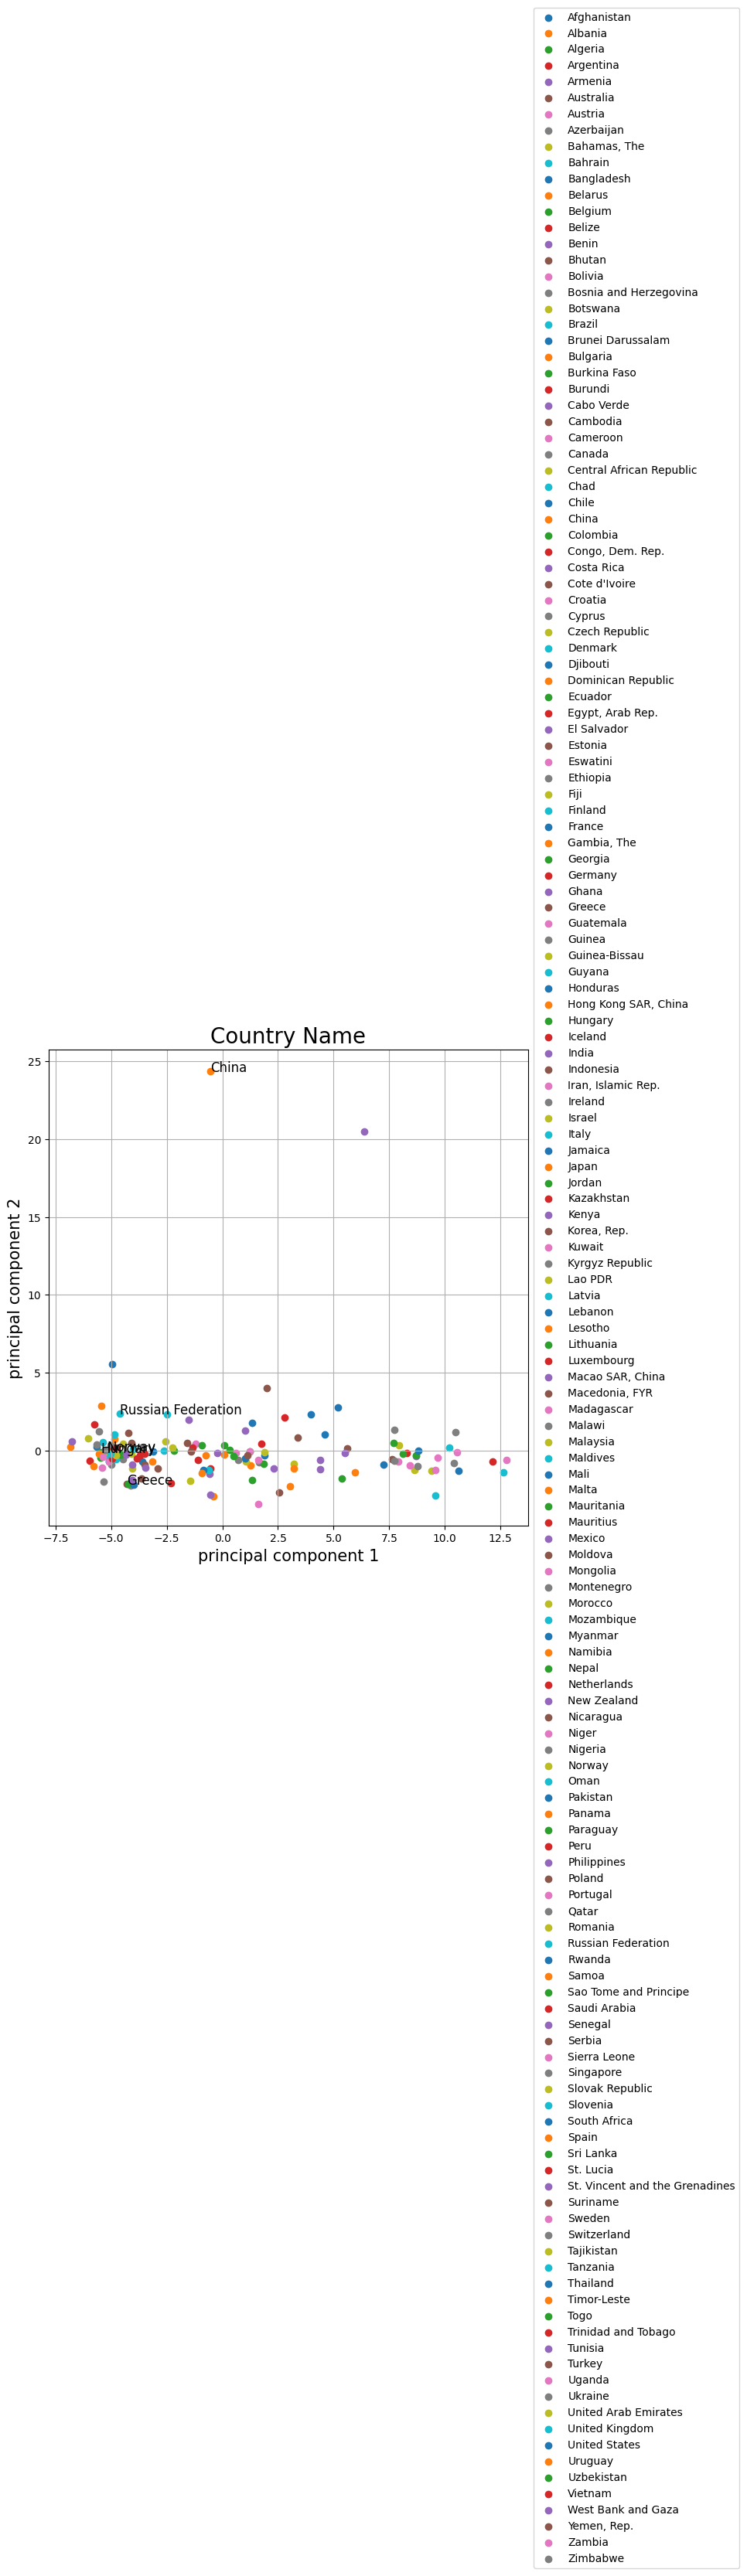

In [209]:
plot_pca(finalDf, "Country Name", 'principal component 1', 'principal component 2',highlights = True)

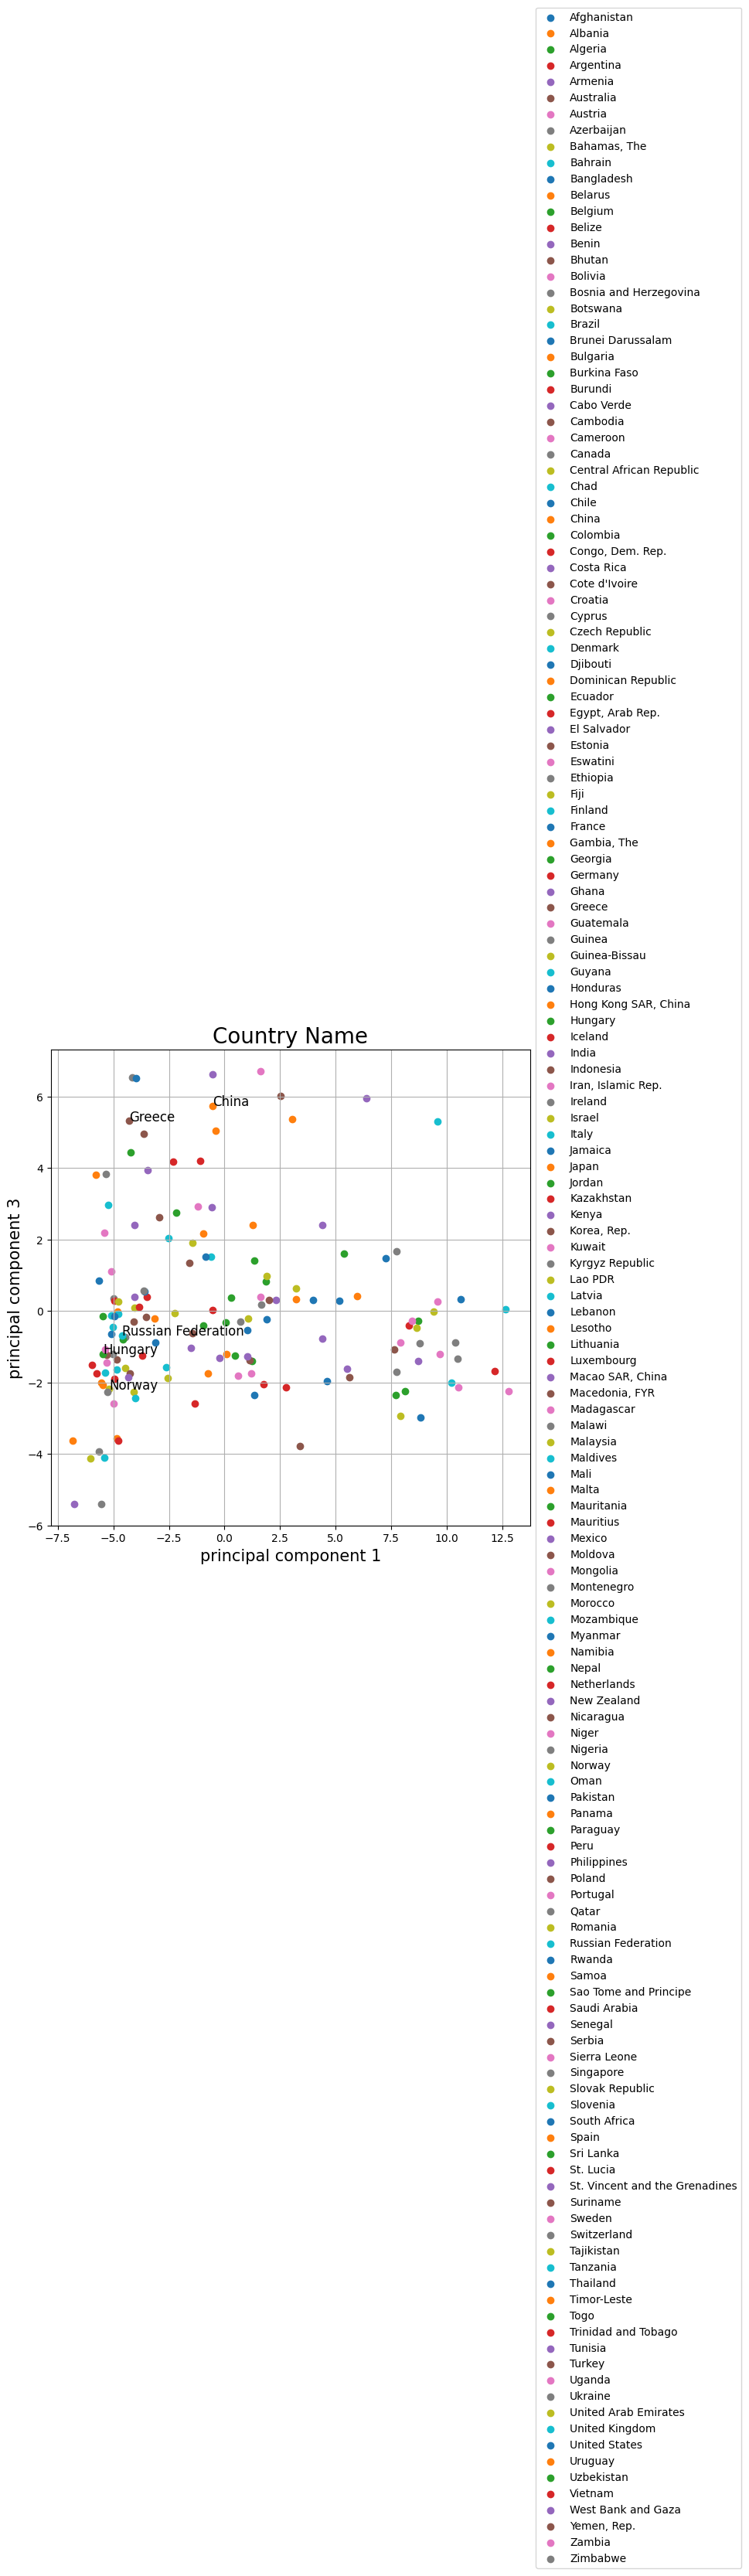

In [208]:
plot_pca(finalDf, "Country Name", 'principal component 1', 'principal component 3',highlights = True)

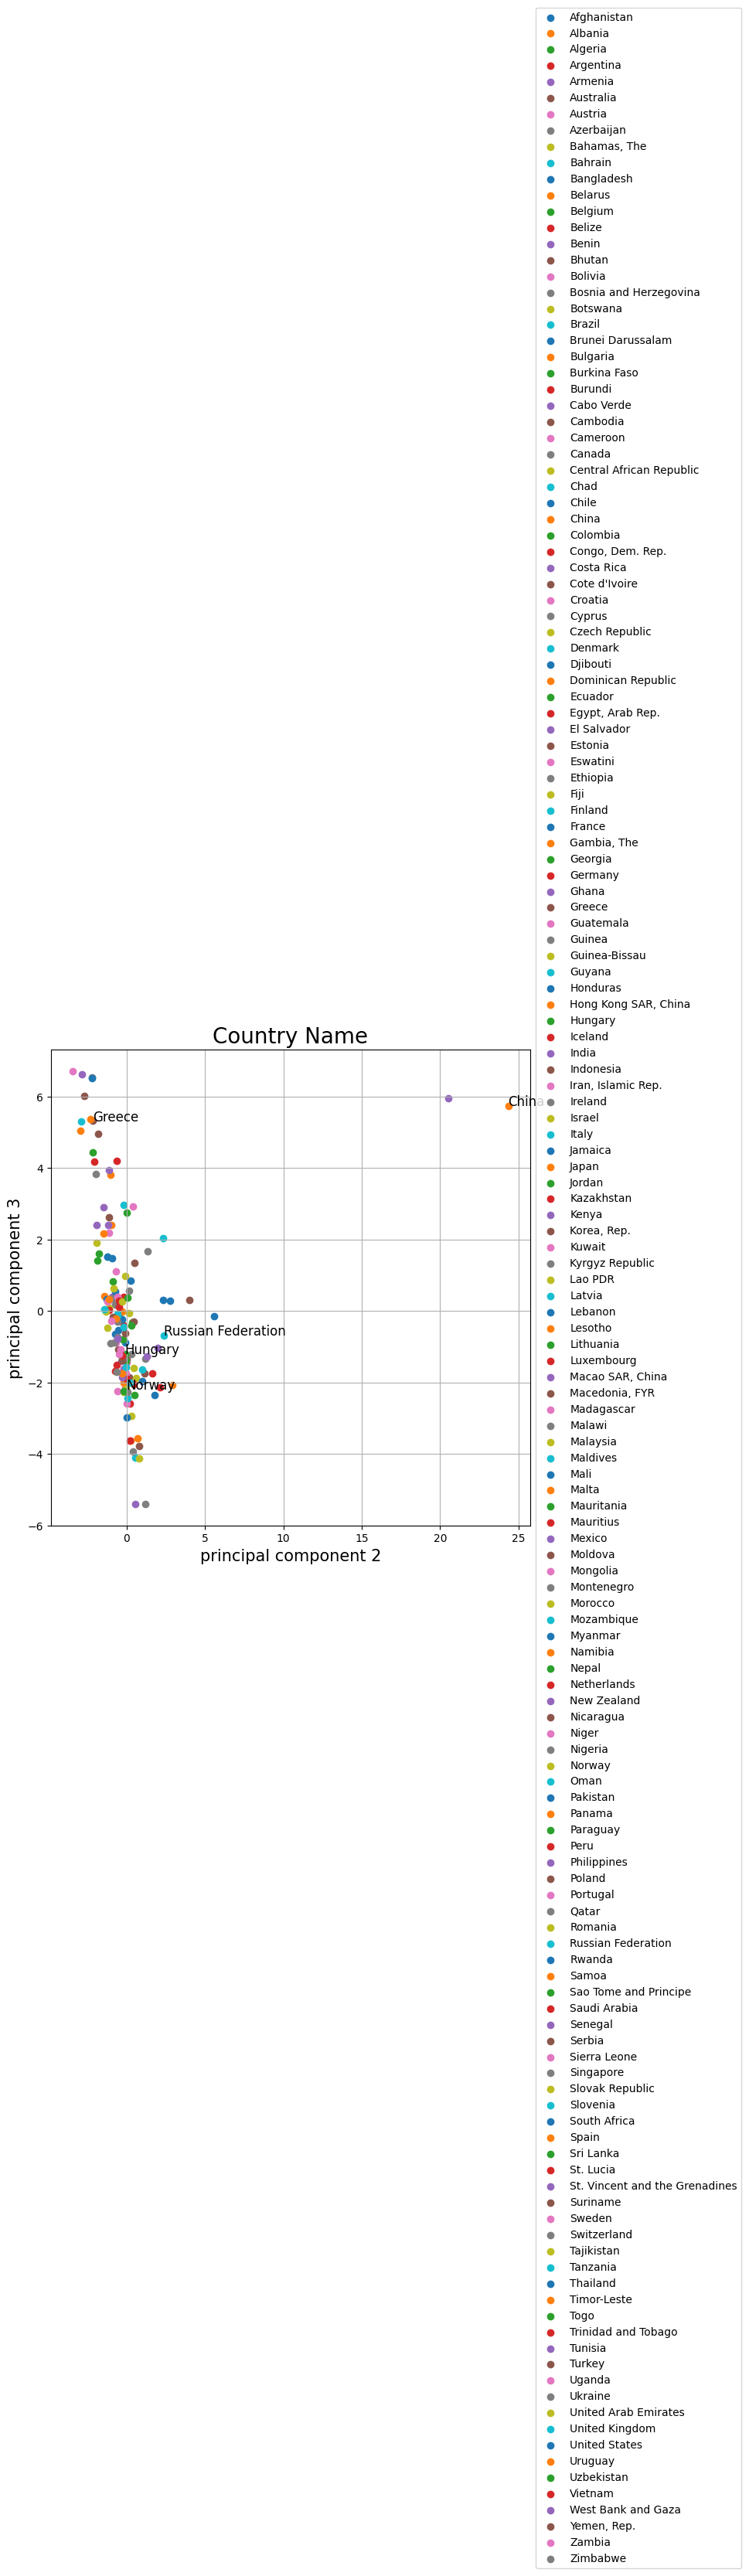

In [206]:
plot_pca(finalDf, "Country Name", 'principal component 2', 'principal component 3',highlights = True)

In [97]:
data_subset = finalDf[['principal component 1','principal component 2', 'principal component 3']].values

In [100]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 158 samples in 0.000s...
[t-SNE] Computed neighbors for 158 samples in 0.247s...
[t-SNE] Computed conditional probabilities for sample 158 / 158
[t-SNE] Mean sigma: 2.277690
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.414612
[t-SNE] KL divergence after 300 iterations: 0.225041
t-SNE done! Time elapsed: 0.5380005836486816 seconds


In [188]:
finalDf

,principal component 1,principal component 2,principal component 3,Country Name,tsne-2d-one,tsne-2d-two
0,7.257474,-0.907401,1.488553,158,10.667212,7.650531
1,1.274987,-0.974603,2.407951,158,0.397744,2.952682
2,-2.173057,-0.002268,2.764256,158,-1.668482,-0.001864
3,-3.499837,-0.190612,0.393483,158,-6.909202,-3.288338
4,-0.582768,-1.474139,2.899892,158,-1.284356,1.453758
...,...,...,...,...,...,...
153,2.780124,2.117265,-2.125900,158,6.273805,5.867733
154,-0.525377,-2.852262,6.632204,158,-3.080549,2.251067
155,2.536135,-2.680977,6.018693,158,-2.048025,3.231572
156,8.441763,-0.955498,-0.272752,158,11.678619,7.233873


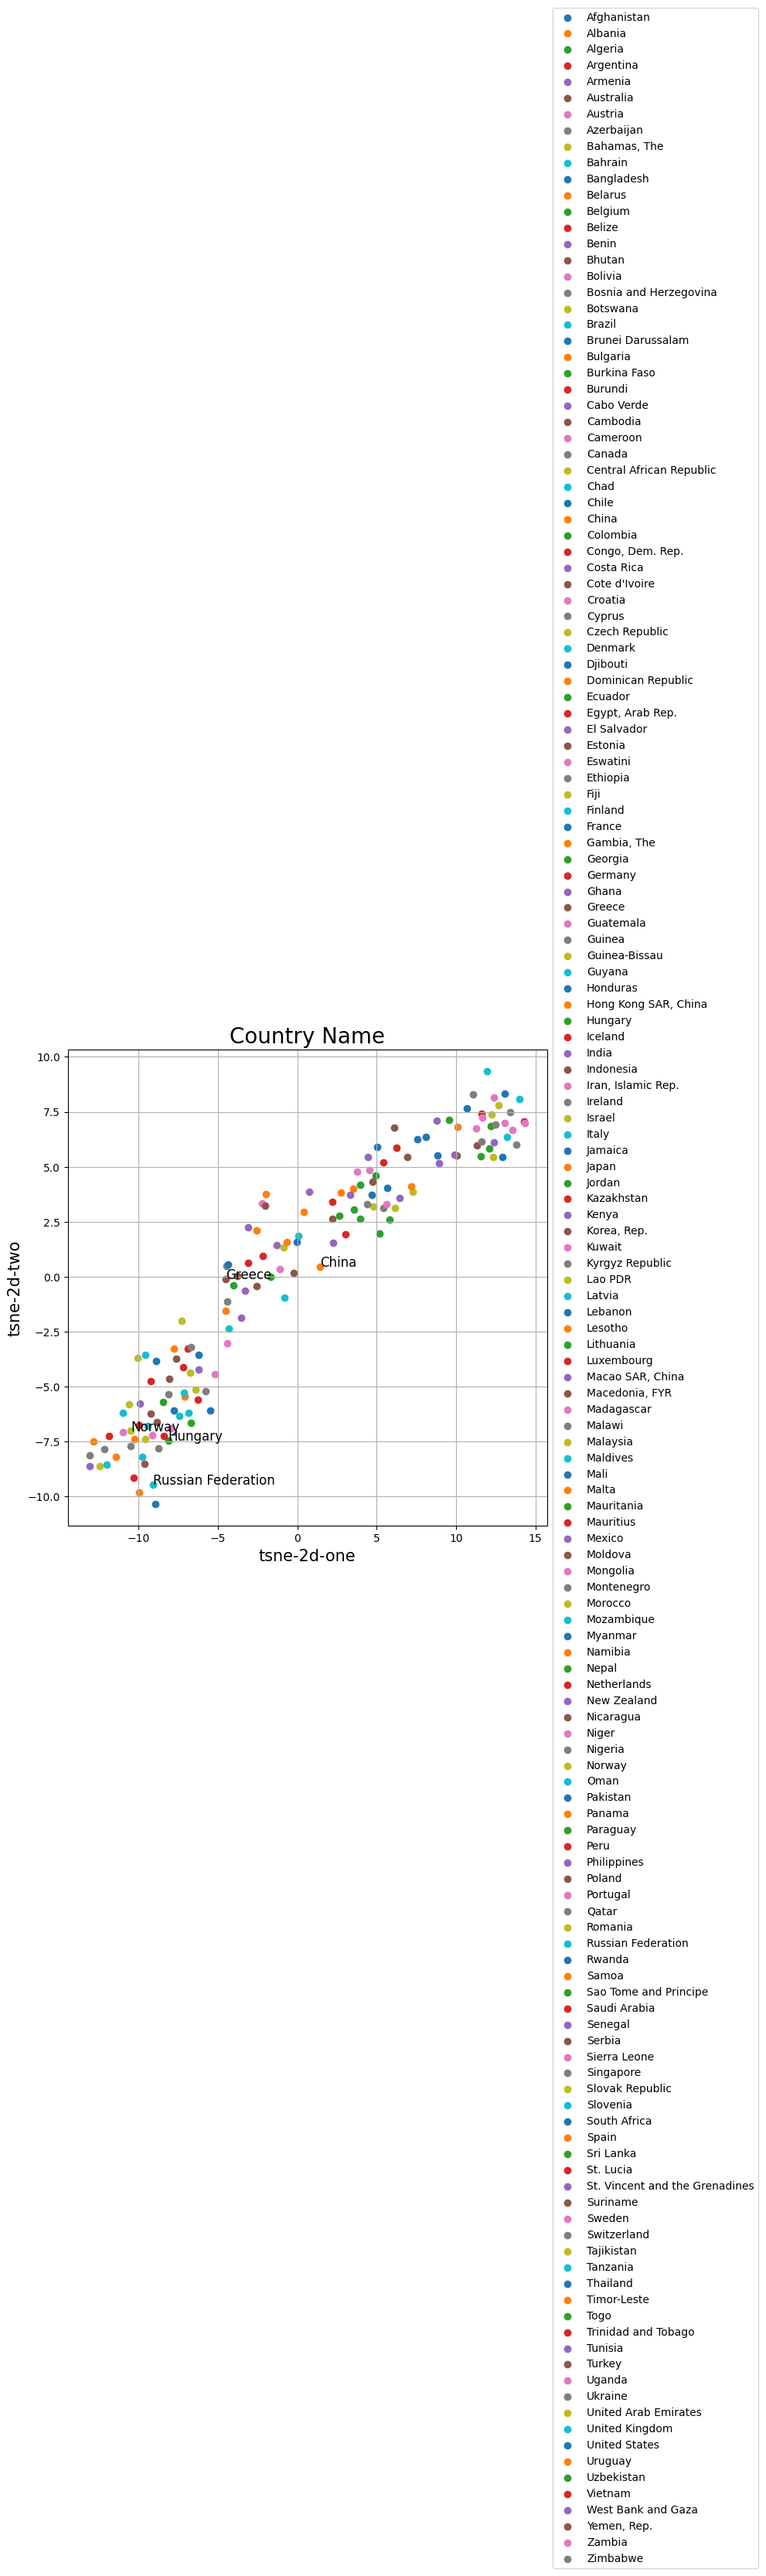

In [192]:
finalDf['tsne-2d-one'] = tsne_results[:,0]
finalDf['tsne-2d-two'] = tsne_results[:,1]
plot_pca(finalDf, 'Country Name', 'tsne-2d-one','tsne-2d-two',highlights = True)

Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?

Hungary: Norway and Russia
Greece: China

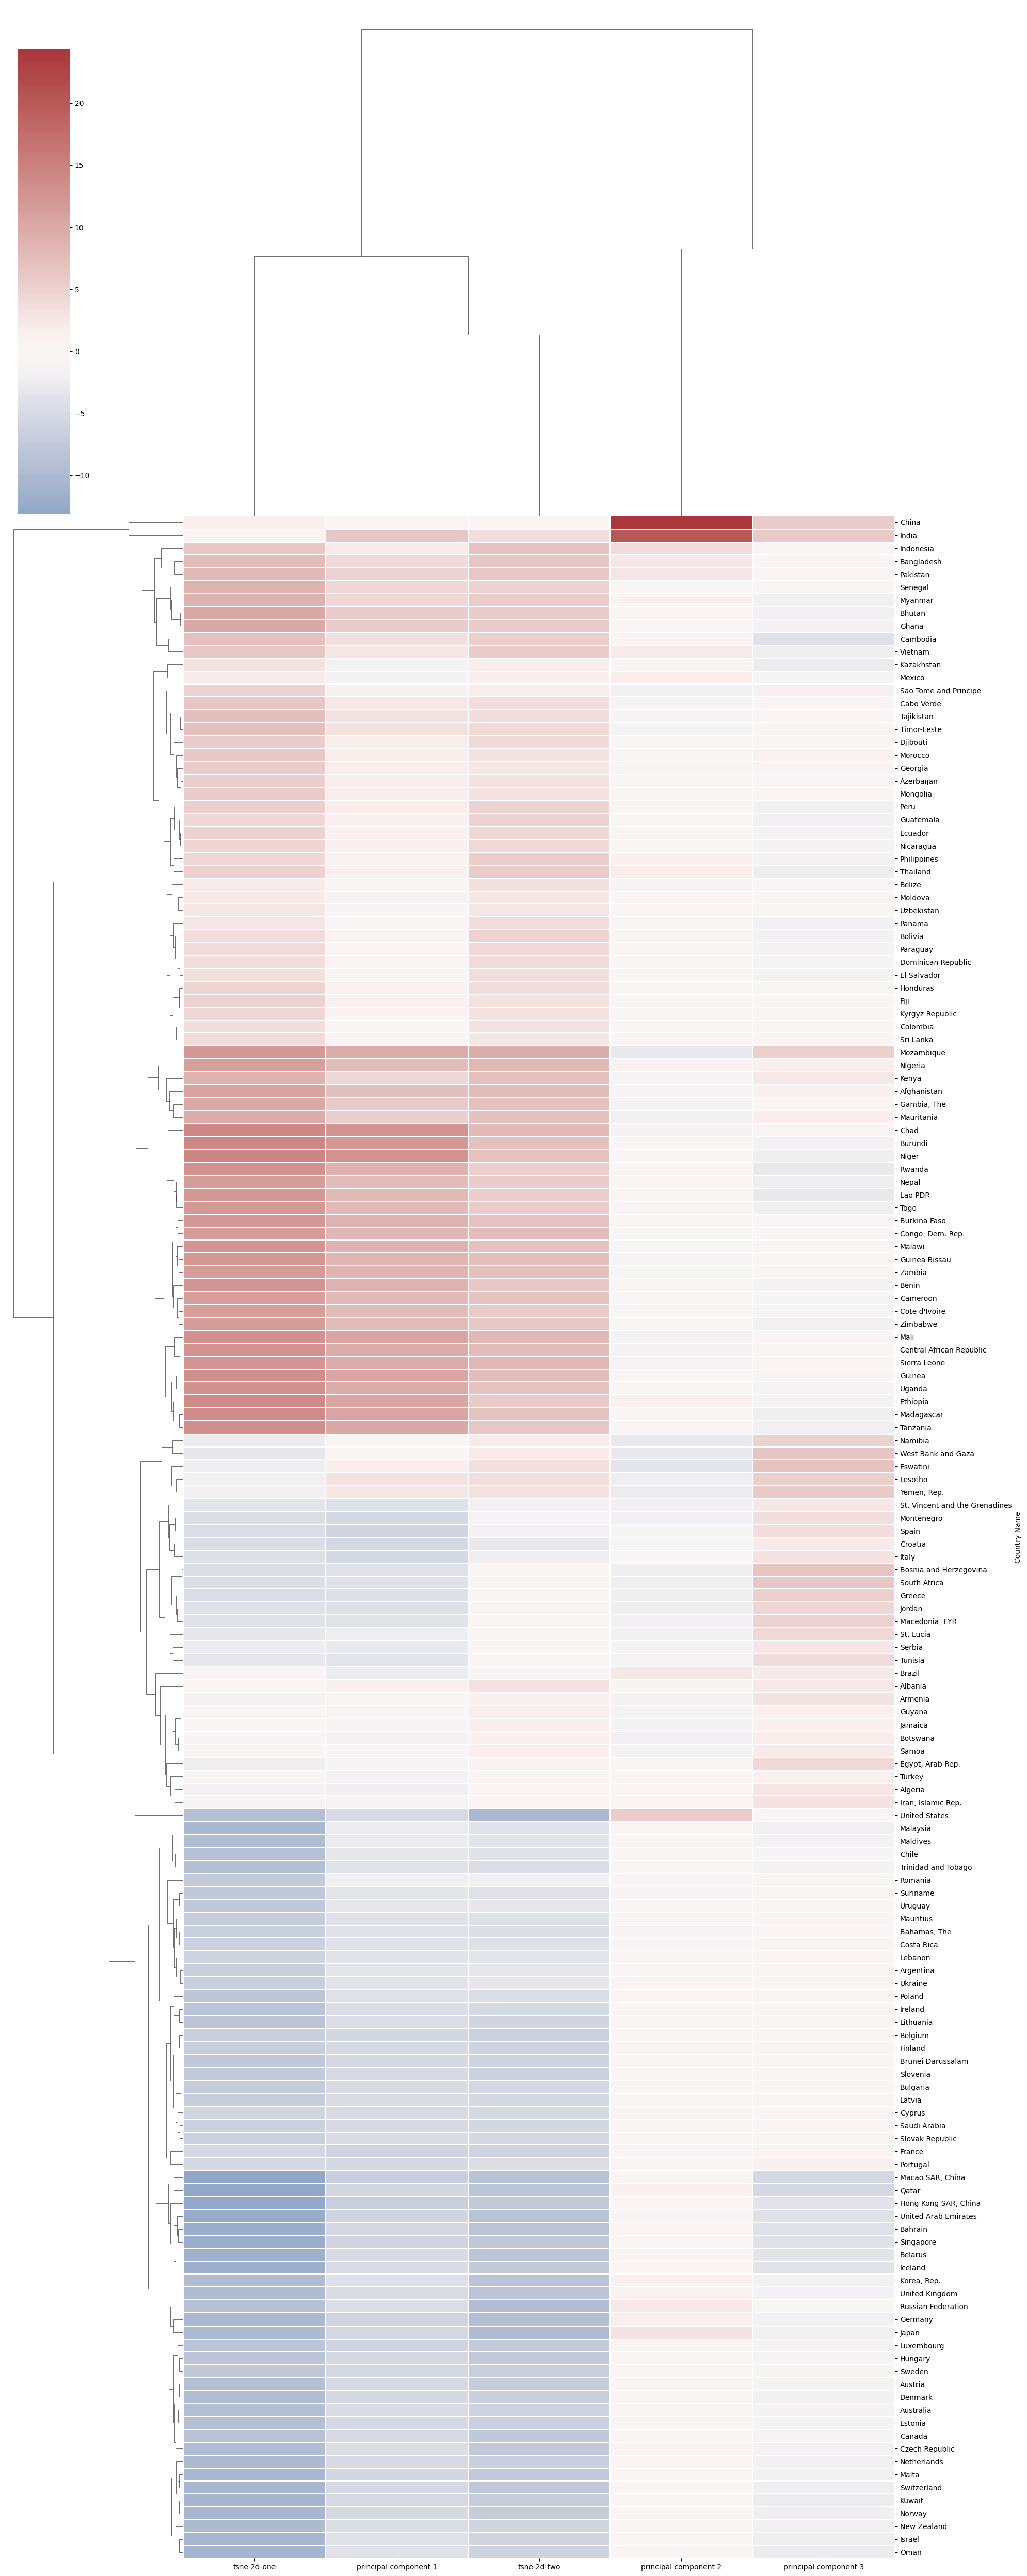

In [205]:
seabornclusterdf = finalDf.set_index("Country Name")

import seaborn as sns
from sunbird.categorical_encoding import frequency_encoding

# Draw the full plot
sns.clustermap(seabornclusterdf, center=0, cmap="vlag",
               linewidths=.2,figsize=(20,50))
# finalDf

In [ ]:
from sklearn.cluster import KMeans

X0 = finalDf['tsne-2d-one']
X1 = finalDf['tsne-2d-two']
X = np.vstack([X0, X1]).T
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(num_clusters), palette=colors, s=20, ec='black', legend=False, ax=ax)

plt.show()

In [ ]:
X0 = finalDf['tsne-2d-one']
X1 = finalDf['tsne-2d-two']
X = np.vstack([X0, X1]).T
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(num_clusters), palette=colors, s=20, ec='black', legend=False, ax=ax)

highlighlist = ["Hungary", "Greece", "Norway", "China", "Russian Federation"]

targets = finalDf["Country Name"].tolist()
for target in targets:
    if target in highlighlist:
        x = finalDf.loc[finalDf["Country Name"] == target]["tsne-2d-one"].iloc[0]
        y = finalDf.loc[finalDf["Country Name"] == target]['tsne-2d-two'].iloc[0]
        plt.text(x, y,target, fontsize=12)
plt.show()

Which cluster are China and Hungary in?

Hungary is in Fourth cluster(3), China is in Third cluster (2).
This plot shows that Hungary overall more similar to Norway and Russia than to China or Greece. 

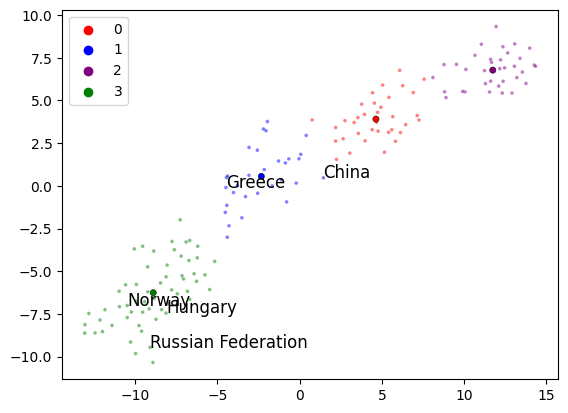

In [224]:
X0 = finalDf['tsne-2d-one']
X1 = finalDf['tsne-2d-two']
X = np.vstack([X0, X1]).T
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(num_clusters), palette=colors, s=20, ec='black', legend=False, ax=ax)

highlighlist = ["Hungary", "Greece", "Norway", "China", "Russian Federation"]

targets = finalDf["Country Name"].tolist()
for target in targets:
    if target in highlighlist:
        x = finalDf.loc[finalDf["Country Name"] == target]["tsne-2d-one"].iloc[0]
        y = finalDf.loc[finalDf["Country Name"] == target]['tsne-2d-two'].iloc[0]
        plt.text(x, y,target, fontsize=12)
plt.show()

Which cluster are China and Hungary in?

Hungary is in Fourth cluster(3), China is in Third cluster (2).
This plot shows that Hungary overall more similar to Norway and Russia than to China or Greece. 